## Implementing Feedforward neural networks with Keras and TensorFlow for
classification of hand-written MNIST dataset using below steps:
a. Import the necessary packages
b. Load the training and testing data
c. Define the network architecture using Keras
d. Train the model using SGD with 11 epochs
e. Evaluate the network
f. Plot the training loss and accuracy

In [ ]:
!unzip "/content/drive/MyDrive/mnistdataset/Copy of mnist-jpg.zip"

Streaming output truncated to the last 5000 lines.
  inflating: mnist-jpg/train/9/1820.jpg  
  inflating: mnist-jpg/train/9/18211.jpg  
  inflating: mnist-jpg/train/9/18228.jpg  
  inflating: mnist-jpg/train/9/18241.jpg  
  inflating: mnist-jpg/train/9/18251.jpg  
  inflating: mnist-jpg/train/9/1826.jpg  
  inflating: mnist-jpg/train/9/18277.jpg  
  inflating: mnist-jpg/train/9/18296.jpg  
  inflating: mnist-jpg/train/9/183.jpg  
  inflating: mnist-jpg/train/9/18350.jpg  
  inflating: mnist-jpg/train/9/18355.jpg  
  inflating: mnist-jpg/train/9/18374.jpg  
  inflating: mnist-jpg/train/9/18377.jpg  
  inflating: mnist-jpg/train/9/18382.jpg  
  inflating: mnist-jpg/train/9/18387.jpg  
  inflating: mnist-jpg/train/9/18401.jpg  
  inflating: mnist-jpg/train/9/18405.jpg  
  inflating: mnist-jpg/train/9/18415.jpg  
  inflating: mnist-jpg/train/9/18437.jpg  
  inflating: mnist-jpg/train/9/18441.jpg  
  inflating: mnist-jpg/train/9/18448.jpg  
  inflating: mnist-jpg/train/9/18458.jpg  
  infla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
trainPath = "/content/mnist-jpg/train"
testPath = "/content/mnist-jpg/test"

In [ ]:
data_gen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_generator = data_gen.flow_from_directory(
    trainPath,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=10000,
    shuffle=True,
    target_size=(28, 28)
)
print(len(train_generator))

Found 60000 images belonging to 10 classes.
6


In [ ]:
test_generator = data_gen.flow_from_directory(
    testPath,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=1000,
    shuffle=True,
    target_size=(28, 28)
)

Found 10000 images belonging to 10 classes.


In [ ]:
xtrain, ytrain = train_generator[0]
xtrain.shape


(10000, 28, 28, 1)

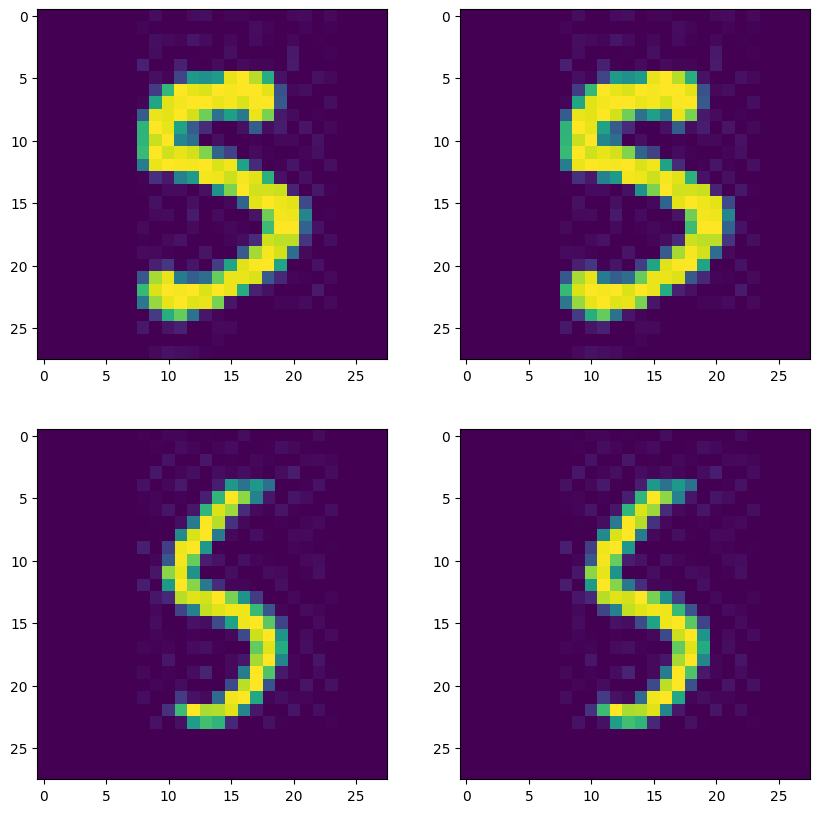

In [ ]:
f, a = plt.subplots(2, 2, figsize=(10 ,10))
cnt = 0
for i in range(2):
  a[i % 2, 0].imshow(xtrain[i])
  a[i % 2, 1].imshow(xtrain[i])


In [ ]:
model = Sequential([
    Dense(128, input_shape=(784,) ,activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(0.01), metrics=['accuracy'])
x = xtrain.reshape(xtrain.shape[0], (28 * 28))
x.shape

(10000, 784)

In [ ]:
xtest, ytest = test_generator[0]
xtest = xtest.reshape(xtest.shape[0], (28 * 28))
h = model.fit(x, ytrain, validation_data=(xtest, ytest), epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 5ms/step - loss: 1.3808 - accuracy: 0.6757 - val_loss: 0.8224 - val_accuracy: 0.8260
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.6635 - accuracy: 0.8493 - val_loss: 0.5600 - val_accuracy: 0.8600
Epoch 3/10
313/313 [==============================] - 1s 5ms/step - loss: 0.5027 - accuracy: 0.8742 - val_loss: 0.4680 - val_accuracy: 0.8820
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4343 - accuracy: 0.8881 - val_loss: 0.4246 - val_accuracy: 0.8820
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8966 - val_loss: 0.3959 - val_accuracy: 0.8890
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.9022 - val_loss: 0.3790 - val_accuracy: 0.8940
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.9077 - val_loss: 0.3616 - val_accuracy: 0.8950
Epoch 

In [ ]:
train_generator1 = data_gen.flow_from_directory(
    trainPath,
    class_mode='categorical',
    batch_size=60000,
    shuffle=True,
    target_size=(28,28),
      color_mode='grayscale',

)

test_generator1 = data_gen.flow_from_directory(
    testPath,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=10000,
    shuffle=True,
    target_size=(28,28)
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [ ]:
xtrain, ytrain = train_generator1[0]
xtest, ytest = test_generator1[0]


(60000, 28, 28, 1)

In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0], (28 * 28))
xtest = xtest.reshape(xtest.shape[0], (28 * 28))
newmodel = Sequential([
    Dense(128,input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])
newmodel.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(0.01), metrics=['accuracy'])
h1 = newmodel.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6619 - accuracy: 0.8348 - val_loss: 0.3596 - val_accuracy: 0.9025
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3415 - accuracy: 0.9048 - val_loss: 0.2946 - val_accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2922 - accuracy: 0.9176 - val_loss: 0.2611 - val_accuracy: 0.9293
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2614 - accuracy: 0.9272 - val_loss: 0.2393 - val_accuracy: 0.9333
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2377 - accuracy: 0.9342 - val_loss: 0.2218 - val_accuracy: 0.9372
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2186 - accuracy: 0.9399 - val_loss: 0.2045 - val_accuracy: 0.9415
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2021 - accuracy: 0.9440 - val_loss: 0.1901 - val_accurac

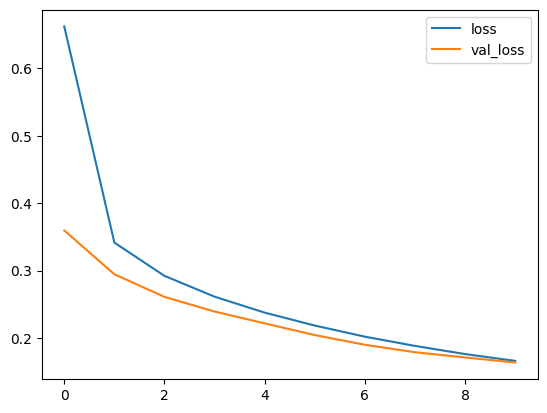

In [59]:
plt.plot(np.arange(10), h1.history['loss'], label='loss')
plt.plot(np.arange(10), h1.history['val_loss'], label='val_loss')
plt.legend()

In [60]:
preds = model.predict(xtest)
preds.shape

313/313 [==============================] - 2s 4ms/step


(10000, 10)

In [ ]:
yout = []
for ele in preds:
  yout.append(np.argmax(ele))


In [64]:
yoriginal = []
for ele in ytest:
  yoriginal.append(np.argmax(ele))


In [65]:
from sklearn.metrics import classification_report
print(classification_report(yoriginal, yout))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.90      0.90      0.90      1010
           4       0.89      0.92      0.90       982
           5       0.91      0.83      0.87       892
           6       0.92      0.94      0.93       958
           7       0.91      0.91      0.91      1028
           8       0.85      0.88      0.87       974
           9       0.88      0.89      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

